# CLUSTERING

imports, libraries, and options

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as pgo

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

pd.options.display.max_colwidth = 500
pd.options.display.max_columns = 99

<br>
read in df_for_modelling df from pkl as df and drop unmodelable columns

In [4]:
data= pd.read_pickle('datasets/df_for_modelling.pkl')
data.columns

Index(['wine', 'name', 'vintage', 'category', 'varietal', 'winery',
       'appellation', 'designation', 'alcohol', 'price', 'rating', 'reviewer',
       'location', 'geocode', 'lat', 'long', 'id', '4_prcp', '4_tmin',
       '4_tmax', '4_avg_tmin', '4_avg_tmax', '5_prcp', '5_tmin', '5_tmax',
       '5_avg_tmin', '5_avg_tmax', '6_prcp', '6_tmin', '6_tmax', '6_avg_tmin',
       '6_avg_tmax', '7_prcp', '7_tmin', '7_tmax', '7_avg_tmin', '7_avg_tmax',
       '8_prcp', '8_tmin', '8_tmax', '8_avg_tmin', '8_avg_tmax', '9_prcp',
       '9_tmin', '9_tmax', '9_avg_tmin', '9_avg_tmax', '10_prcp', '10_tmin',
       '10_tmax', '10_avg_tmin', '10_avg_tmax', 'spring_prcp_tot',
       'summer_prcp_tot', 'autumn_prcp_tot', 'spring_tmax_avg',
       'summer_tmax_avg', 'autumn_tmax_avg', 'spring_tmin_avg',
       'summer_tmin_avg', 'autumn_tmin_avg'],
      dtype='object')

In [5]:
# these columns won't be used in the modelling or to make new modelling df so we will drop them here 
data.drop(columns= ['wine', 'name', 'winery', 'appellation', 'designation', 'geocode', 'id'], inplace= True)
data.columns

Index(['vintage', 'category', 'varietal', 'alcohol', 'price', 'rating',
       'reviewer', 'location', 'lat', 'long', '4_prcp', '4_tmin', '4_tmax',
       '4_avg_tmin', '4_avg_tmax', '5_prcp', '5_tmin', '5_tmax', '5_avg_tmin',
       '5_avg_tmax', '6_prcp', '6_tmin', '6_tmax', '6_avg_tmin', '6_avg_tmax',
       '7_prcp', '7_tmin', '7_tmax', '7_avg_tmin', '7_avg_tmax', '8_prcp',
       '8_tmin', '8_tmax', '8_avg_tmin', '8_avg_tmax', '9_prcp', '9_tmin',
       '9_tmax', '9_avg_tmin', '9_avg_tmax', '10_prcp', '10_tmin', '10_tmax',
       '10_avg_tmin', '10_avg_tmax', 'spring_prcp_tot', 'summer_prcp_tot',
       'autumn_prcp_tot', 'spring_tmax_avg', 'summer_tmax_avg',
       'autumn_tmax_avg', 'spring_tmin_avg', 'summer_tmin_avg',
       'autumn_tmin_avg'],
      dtype='object')

<br>
cluster data based on monthly climate variables, lat, long

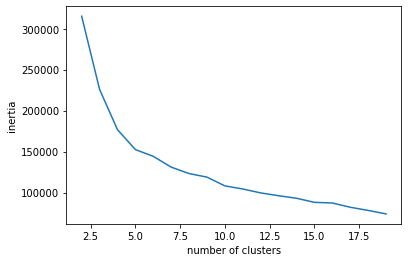

In [13]:
# columns not needed for cluster analysis
not_col= ['category', 'varietal', 'alcohol', 'price', 'rating', 'reviewer', 'location', 'spring_prcp_tot', 'summer_prcp_tot', 'autumn_prcp_tot', 
          'spring_tmax_avg', 'summer_tmax_avg', 'autumn_tmax_avg', 'spring_tmin_avg', 'summer_tmin_avg', 'autumn_tmin_avg', 'vintage']

# define new clust_df
clust_df= data.drop(columns= not_col)

# scale data
ss= StandardScaler()
ss.fit(clust_df)
Z_df= ss.transform(clust_df)

# search through variables for best value for num of clusters
scores= []

for k in range(2, 20):
    kmeans= KMeans(n_clusters= k, random_state= 42)
    kmeans.fit(Z_df)
    inertia= kmeans.inertia_
    scores.append([k, inertia])

# plot of num of clusters and their inertia, where the elbow is the ideal num of clusters
inertia_df= pd.DataFrame(scores, columns= ['n_clusters', 'inertia'])
plt.plot(inertia_df['n_clusters'], inertia_df['inertia'])
plt.xlabel('number of clusters'), plt.ylabel('inertia');

<br>
perform KMeans clustering on clust_df with ideal num of clusters from plot: 4

In [15]:
# KMeans clustering
km= KMeans(n_clusters= 4, random_state= 42) 
km.fit(Z_df)

# append cluster column to data df making new data_clust
data_clust= data.copy()
data_clust['cluster']= km.labels_

In [456]:
# data_clust.to_csv('datasets/clusters.csv', index= False)

<br>
determine distribution of wines in each cluster

In [16]:
data_clust['cluster'].value_counts() 

0    7865
3    1966
1     872
2     870
Name: cluster, dtype: int64

groupby cluster and look at how variables are represented in each one

In [125]:
data_clust.groupby(by= ['cluster'])['rating'].mean(), data_clust.groupby('cluster')['price'].mean(), data_clust.groupby('cluster')['alcohol'].mean(), data_clust.groupby('cluster')['vintage'].mean()

(cluster
 0    88.757279
 1    89.444954
 2    89.522989
 3    89.831129
 Name: rating, dtype: float64,
 cluster
 0    39.834275
 1    34.792431
 2    47.644828
 3    42.647762
 Name: price, dtype: float64,
 cluster
 0    14.428830
 1    13.996433
 2    14.413575
 3    14.017803
 Name: alcohol, dtype: float64,
 cluster
 0    2011.347997
 1    2011.637615
 2    2013.535632
 3    2012.752289
 Name: vintage, dtype: float64)

how clusters change depending on seasonal variables

''

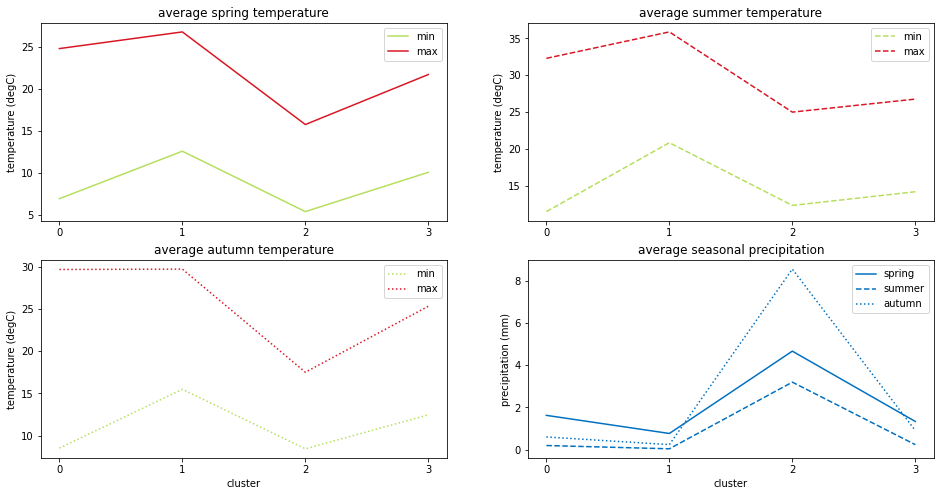

In [122]:
fig, axes= plt.subplots(nrows= 2, ncols= 2, figsize= (16, 8))
axes[0, 0].plot(data_clust.groupby(['cluster'])['spring_tmin_avg'].mean(), label= 'min', color= '#B6DF5E')
axes[0, 0].plot(data_clust.groupby(['cluster'])['spring_tmax_avg'].mean(), label= 'max', color= '#D81624')
axes[0, 0].set_title('average spring temperature')
axes[0, 0].set_ylabel('temperature (degC)')
axes[0, 0].set_xticks([0, 1, 2, 3])
axes[0, 0].legend()

axes[0, 1].plot(data_clust.groupby(['cluster'])['summer_tmin_avg'].mean(), label= 'min', color= '#B6DF5E', linestyle= 'dashed')
axes[0, 1].plot(data_clust.groupby(['cluster'])['summer_tmax_avg'].mean(), label= 'max', color= '#D81624', linestyle= 'dashed')
axes[0, 1].set_title('average summer temperature') 
axes[0, 1].set_ylabel('temperature (degC)')
axes[0, 1].set_xticks([0, 1, 2, 3])
axes[0, 1].legend()

axes[1, 0].plot(data_clust.groupby(['cluster'])['autumn_tmin_avg'].mean(), label= 'min', color= '#B6DF5E', linestyle= 'dotted')
axes[1, 0].plot(data_clust.groupby(['cluster'])['autumn_tmax_avg'].mean(), label= 'max', color= '#D81624', linestyle= 'dotted')
axes[1, 0].set_title('average autumn temperature') 
axes[1, 0].set_ylabel('temperature (degC)')
axes[1, 0].set_xlabel('cluster')
axes[1, 0].set_xticks([0, 1, 2, 3])
axes[1, 0].legend()

axes[1, 1].plot(data_clust.groupby(['cluster'])['spring_prcp_tot'].mean(), label= 'spring', color= '#0070C0')
axes[1, 1].plot(data_clust.groupby(['cluster'])['summer_prcp_tot'].mean(), label= 'summer', color= '#0070C0', linestyle= 'dashed')
axes[1, 1].plot(data_clust.groupby(['cluster'])['autumn_prcp_tot'].mean(), label= 'autumn', color= '#0070C0', linestyle= 'dotted')
axes[1, 1].set_title('average seasonal precipitation') 
axes[1, 1].set_ylabel('precipitation (mm)')
axes[1, 1].set_xlabel('cluster')
axes[1, 1].set_xticks([0, 1, 2, 3])
axes[1, 1].legend()
;

In [123]:
data_clust.groupby(by= 'cluster')['spring_tmin_avg', 'summer_tmin_avg', 'autumn_tmin_avg', 'spring_tmax_avg', 'summer_tmax_avg', 'autumn_tmax_avg',
                                  'spring_prcp_tot', 'summer_prcp_tot', 'autumn_prcp_tot', 'lat', 'long'].mean()

C:\Users\kindb\AppData\Local\Temp/ipykernel_27684/4152545086.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_clust.groupby(by= 'cluster')['spring_tmin_avg', 'summer_tmin_avg', 'autumn_tmin_avg', 'spring_tmax_avg', 'summer_tmax_avg', 'autumn_tmax_avg',


,spring_tmin_avg,summer_tmin_avg,autumn_tmin_avg,spring_tmax_avg,summer_tmax_avg,autumn_tmax_avg,spring_prcp_tot,summer_prcp_tot,autumn_prcp_tot,lat,long
cluster,,,,,,,,,,,
0,6.928635,11.475350,8.528931,24.838235,32.288189,29.664894,1.622817,0.193544,0.598780,36.023878,-120.940229
1,12.594957,20.832203,15.486936,26.826815,35.877162,29.707465,0.764169,0.037305,0.235880,35.767040,-119.131839
2,5.388970,12.317934,8.444470,15.777108,24.985362,17.506078,4.665536,3.196206,8.553049,48.242855,-121.106746
3,10.077060,14.172605,12.465821,21.742353,26.752303,25.314058,1.333633,0.234031,0.906803,37.799534,-121.799767


In [114]:
data_clust.groupby(by= 'cluster')['spring_tmin_avg', 'summer_tmin_avg', 'autumn_tmin_avg', 'spring_tmax_avg', 'summer_tmax_avg', 'autumn_tmax_avg',
                                  'spring_prcp_tot', 'summer_prcp_tot', 'autumn_prcp_tot',].max()

C:\Users\kindb\AppData\Local\Temp/ipykernel_27684/2394245146.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_clust.groupby(by= 'cluster')['spring_tmin_avg', 'summer_tmin_avg', 'autumn_tmin_avg', 'spring_tmax_avg', 'summer_tmax_avg', 'autumn_tmax_avg',


,spring_tmin_avg,summer_tmin_avg,autumn_tmin_avg,spring_tmax_avg,summer_tmax_avg,autumn_tmax_avg,spring_prcp_tot,summer_prcp_tot,autumn_prcp_tot
cluster,,,,,,,,,
0,9.919570,16.907058,11.159355,28.662473,34.644265,33.972312,6.674301,4.350000,3.353011
1,14.173172,22.933405,17.849946,29.044713,37.750932,33.565163,2.338925,1.025806,4.329032
2,10.299355,14.107051,13.468172,21.005269,28.985735,24.314194,7.255269,7.900000,14.005054
3,13.706882,19.126918,19.046237,24.295054,32.081466,30.124946,8.128571,2.500000,7.350323


In [116]:
data_clust.groupby(by= 'cluster')['spring_tmin_avg', 'summer_tmin_avg', 'autumn_tmin_avg', 'spring_tmax_avg', 'summer_tmax_avg', 'autumn_tmax_avg',
                                  'spring_prcp_tot', 'summer_prcp_tot', 'autumn_prcp_tot',].min()

C:\Users\kindb\AppData\Local\Temp/ipykernel_27684/1863154771.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_clust.groupby(by= 'cluster')['spring_tmin_avg', 'summer_tmin_avg', 'autumn_tmin_avg', 'spring_tmax_avg', 'summer_tmax_avg', 'autumn_tmax_avg',


,spring_tmin_avg,summer_tmin_avg,autumn_tmin_avg,spring_tmax_avg,summer_tmax_avg,autumn_tmax_avg,spring_prcp_tot,summer_prcp_tot,autumn_prcp_tot
cluster,,,,,,,,,
0,4.468118,8.762437,5.667258,18.179892,27.992509,22.288387,0.000000,0.000000,0.00000
1,8.666398,15.710000,13.040269,21.814286,32.140775,23.299086,0.000000,0.000000,0.00000
2,3.115538,10.618280,7.166237,11.599032,22.103907,15.088387,1.796559,1.076667,1.37129
3,6.041559,10.535950,8.738548,16.630860,17.175986,17.910806,0.000000,0.000000,0.00000
